In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.metrics import top_k_categorical_accuracy

import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from tensorflow.keras.models import Sequential
from PIL import Image
import matplotlib.pyplot as plt
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
%matplotlib inline
import os

from keras.datasets import fashion_mnist


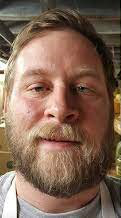

In [4]:
imagee=Image.open('drunk and drive dataset\dataset\Drunk\Images 1.jpeg')

imagee=imagee.resize((224,224))

imageee=Image.open('drunk and drive dataset\dataset\Drunk\Images 1.jpeg')
imageee

In [26]:
(x_train,y_train), (x_test,y_test)= fashion_mnist.load_data()
print (x_train.shape)
x_train,x_test= x_train/255.0,x_test/255.0



(60000, 28, 28)


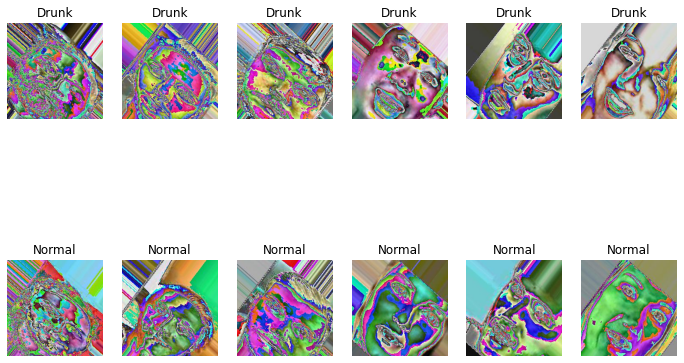

In [87]:

import cv2

directory = "drunk and drive dataset\dataset"
cases = ['Drunk', 'Normal']

fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(12, 8))

for index, case in enumerate(cases):
    img_list = os.listdir(os.path.join(directory, case))
    for i in range(6):
        img = cv2.imread(os.path.join(directory, case, img_list[i]))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[index, i].imshow(img_rgb)
        ax[index, i].axis('off')
        ax[index, i].set_title(case) 


In [27]:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your directories
input_dirs = ['drunk and drive dataset\\dataset\\Drunk', 'drunk and drive dataset\\dataset\\Normal']
output_dirs = ['drunk and drive dataset\\dataset\\Test\\Drunk', 'drunk and drive dataset\\dataset\\Test\\Normal']

# Make sure output directories exist
for dir in output_dirs:
    os.makedirs(dir, exist_ok=True)

# Create an ImageDataGenerator for augmentation
batch_size=32
datagen = ImageDataGenerator(
    rescale=1.0/255,
    samplewise_center=True,
    samplewise_std_normalization=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    cval=0,
    validation_split=0.2
)

# Process each input directory
for input_dir, output_dir in zip(input_dirs, output_dirs):
    # Get all image files in the input directory
    images = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]

    # Process each image file
    for image_file in images:
        # Open and preprocess the image
        img = Image.open(os.path.join(input_dir, image_file))
        img = img.resize((224, 224))  # replace with your dimensions

        # Save the preprocessed image
        img.save(os.path.join(output_dir, 'preprocessed_' + image_file))

        # Augment the image
        img_array = np.expand_dims(np.array(img), axis=0)
        train_generator = datagen.flow(
        img_array,  # Use the correct path here
        batch_size=batch_size,
        subset='training',
        #color_mode='rgb',
        shuffle=True,
        seed=2022
    )

        aug_img_array = next(train_generator)[0]

        # Convert the augmented image array back to a PIL image
        aug_img = Image.fromarray((aug_img_array * 255).astype(np.uint8))
        aug_rgb=aug_img.convert('RGB')
        # Save the augmented image
        aug_rgb.save(os.path.join(output_dir, 'augmented_' + image_file))


In [28]:
batch_size=32
datagen = ImageDataGenerator(
    rescale=1.0/255,
    samplewise_center=True,
    samplewise_std_normalization=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    cval=0,
    validation_split=0.2
)

#train_data=tf.data.Dataset.from_tensor_slices((img))
x_train = np.expand_dims(x_train, -1)

train_generator = datagen.flow(
    (x_train,y_train), #Use the correct path here
    #target_size=(28, 28),
    batch_size=batch_size,
    #class_mode='categorical',
    subset='training',
    #color_mode='rgb',
    shuffle=True,
    seed=2022
)

'''
validation_generator = datagen.flow_from_directory(
    x_test,  # Use the correct path here
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)'''
#validation_generator=validation_generator.repeat()

"\nvalidation_generator = datagen.flow_from_directory(\n    x_test,  # Use the correct path here\n    target_size=(28, 28),\n    batch_size=batch_size,\n    class_mode='categorical',\n    subset='validation',\n    shuffle=False\n)"

In [35]:
#from sklearn.preprocessing import OneHotEncoder

#labels = get_labels(directory)
#labels_arr=np.array(labels)
#labels_arr =  labels_arr.reshape(-1, 1)

#encoder = OneHotEncoder(sparse=False)
#labels_onehot = encoder.fit_transform(labels_arr)


In [ ]:
def get_labels(data_dir):
    # Get all subdirectories
    subdirs = os.listdir(data_dir)

    labels = []
    for subdir in subdirs:
        # Get all files in each subdirectory
        files = os.listdir(os.path.join(data_dir, subdir))
        
        # Add a label for each file in this subdirectory
        labels.extend([subdir] * len(files))

    return labels

In [ ]:
'''early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=20,          # Number of epochs with no improvement to wait
    restore_best_weights=True,  # Restore the best model weights when stopping

)'''

In [30]:
#image.shape

In [39]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    layers.Conv2D(64,(3,3),activation='relu'),layers.MaxPooling2D(2,2),              
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    #ense(16, activation='sigmoid'),
    Dense(10,activation='sigmoid')
])


In [43]:
for layer in model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 64)        

In [44]:
'''history = model.fit(
    train_generator,
    y_train,
    epochs=100,
    validation_data=((x_test,y_test))),
    #callbacks=[early_stopping])
    '''

'history = model.fit(\n    train_generator,\n    y_train,\n    epochs=100,\n    validation_data=((x_test,y_test))),\n    #callbacks=[early_stopping])\n    '

In [45]:
history = model.fit(train_generator, epochs=10, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))
test_loss, test_accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test, verbose=2)
print("\nTest accuracy:", test_accuracy)


Epoch 1/10
1233/1500 [=======================>......] - ETA: 3s - loss: 2.3118 - accuracy: 0.0949

KeyboardInterrupt: 